### Linear Regression Task

- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

a_df = pd.read_csv('./datasets/advertising.csv')
a_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
a_df.drop(labels=['Unnamed: 0'],axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
a_df.corr()['Sales'].sort_values(ascending=False)

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64

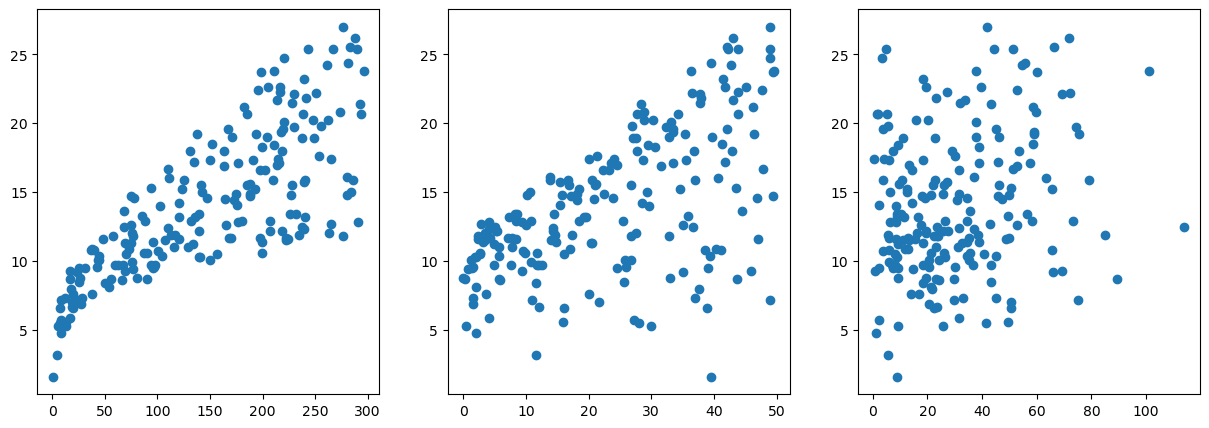

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].scatter(a_df.TV, a_df.Sales)
axes[1].scatter(a_df.Radio, a_df.Sales)
axes[2].scatter(a_df.Newspaper, a_df.Sales)

In [5]:
pre_a_df = a_df[['TV','Sales']]
pre_a_df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

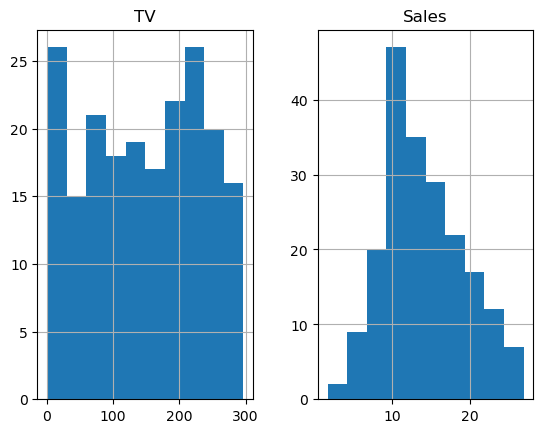

In [29]:
pre_a_df.hist()

In [6]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

In [7]:
features, targets = pre_a_df.iloc[:,:-1], pre_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

In [8]:
torch.manual_seed(124)

W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = SGD([W,b], lr= 1e-6)

epochs= 5000

for epoch in range(1, epochs+1):
    H = W * X_train + b # 예측값(가설)
    loss = torch.mean((y_train - H)**2) # 손실함수

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0: 
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss:{:.4f}'\
              .format(epoch, epochs,W.item(),b.item(), loss.item()))

 100/5000: W: 0.0831, b: 0.0008, loss:22.7272
 200/5000: W: 0.0832, b: 0.0011, loss:22.7251
 300/5000: W: 0.0832, b: 0.0014, loss:22.7240
 400/5000: W: 0.0832, b: 0.0017, loss:22.7229
 500/5000: W: 0.0832, b: 0.0021, loss:22.7218
 600/5000: W: 0.0832, b: 0.0024, loss:22.7207
 700/5000: W: 0.0832, b: 0.0027, loss:22.7196
 800/5000: W: 0.0832, b: 0.0031, loss:22.7185
 900/5000: W: 0.0832, b: 0.0034, loss:22.7174
1000/5000: W: 0.0832, b: 0.0037, loss:22.7163
1100/5000: W: 0.0832, b: 0.0041, loss:22.7152
1200/5000: W: 0.0832, b: 0.0044, loss:22.7141
1300/5000: W: 0.0832, b: 0.0047, loss:22.7130
1400/5000: W: 0.0832, b: 0.0051, loss:22.7119
1500/5000: W: 0.0832, b: 0.0054, loss:22.7108
1600/5000: W: 0.0832, b: 0.0057, loss:22.7097
1700/5000: W: 0.0832, b: 0.0061, loss:22.7087
1800/5000: W: 0.0832, b: 0.0064, loss:22.7076
1900/5000: W: 0.0832, b: 0.0067, loss:22.7065
2000/5000: W: 0.0832, b: 0.0070, loss:22.7054
2100/5000: W: 0.0832, b: 0.0074, loss:22.7043
2200/5000: W: 0.0832, b: 0.0077, l

In [9]:
# 훈련을 기반으로 예측
print(y_train)
print(0.0832 * X_train +0.0170)

print('='*40)

print(('정답','예측'))
for eval in zip(y_train, 0.0832 * X_train +0.0170):
    print(eval)

tensor([[ 5.9000],
        [22.2000],
        [25.4000],
        [15.5000],
        [25.5000],
        [ 9.7000],
        [10.5000],
        [21.5000],
        [17.3000],
        [ 6.9000],
        [19.6000],
        [11.7000],
        [18.0000],
        [10.8000],
        [17.4000],
        [12.8000],
        [11.7000],
        [ 7.6000],
        [11.8000],
        [19.4000],
        [ 8.4000],
        [10.6000],
        [11.4000],
        [ 9.6000],
        [19.7000],
        [23.2000],
        [ 9.9000],
        [ 9.6000],
        [ 3.2000],
        [19.2000],
        [ 5.6000],
        [18.5000],
        [17.0000],
        [23.7000],
        [12.0000],
        [12.3000],
        [11.9000],
        [18.4000],
        [15.2000],
        [11.9000],
        [24.7000],
        [21.8000],
        [19.6000],
        [10.8000],
        [10.4000],
        [23.8000],
        [14.6000],
        [22.1000],
        [ 8.7000],
        [17.1000],
        [ 8.8000],
        [19.0000],
        [10.

In [10]:
import numpy as np
H = 0.083 * X_test + 0.0170
# MSE
print(mse_loss(H,y_test).item())
# RMSE
print(np.sqrt(mse_loss(H,y_test).item()))

24.20636558532715
4.919996502572654


<function matplotlib.pyplot.show(close=None, block=None)>

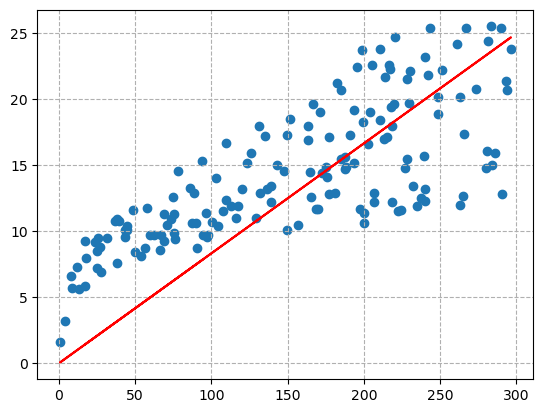

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0832 * X_train +0.0170, color='red')
plt.grid(visible=True, linestyle = '--')
plt.show

In [12]:
features, targets = pre_a_df.iloc[:,:-1], pre_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

In [13]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)
l_r = Linear(1, 1)

optimizer = SGD(l_r.parameters(), lr = 1e-5)


epochs= 5000

for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0: 
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss:{:.4f}'\
              .format(epoch, epochs,W,b, loss.item()))

 100/5000: W: 0.0819, b: 0.2694, loss:21.8527
 200/5000: W: 0.0819, b: 0.2726, loss:21.8425
 300/5000: W: 0.0819, b: 0.2758, loss:21.8324
 400/5000: W: 0.0818, b: 0.2790, loss:21.8222
 500/5000: W: 0.0818, b: 0.2822, loss:21.8121
 600/5000: W: 0.0818, b: 0.2853, loss:21.8020
 700/5000: W: 0.0818, b: 0.2885, loss:21.7918
 800/5000: W: 0.0818, b: 0.2917, loss:21.7817
 900/5000: W: 0.0818, b: 0.2949, loss:21.7716
1000/5000: W: 0.0817, b: 0.2981, loss:21.7615
1100/5000: W: 0.0817, b: 0.3012, loss:21.7514
1200/5000: W: 0.0817, b: 0.3044, loss:21.7413
1300/5000: W: 0.0817, b: 0.3076, loss:21.7313
1400/5000: W: 0.0817, b: 0.3108, loss:21.7212
1500/5000: W: 0.0817, b: 0.3139, loss:21.7112
1600/5000: W: 0.0816, b: 0.3171, loss:21.7011
1700/5000: W: 0.0816, b: 0.3203, loss:21.6911
1800/5000: W: 0.0816, b: 0.3234, loss:21.6811
1900/5000: W: 0.0816, b: 0.3266, loss:21.6711
2000/5000: W: 0.0816, b: 0.3298, loss:21.6611
2100/5000: W: 0.0816, b: 0.3329, loss:21.6511
2200/5000: W: 0.0815, b: 0.3361, l

In [14]:
import numpy as np
H = 0.0811 * X_test + 0.4240
# MSE
print(mse_loss(H,y_test).item())
# RMSE
print(np.sqrt(mse_loss(H,y_test).item()))

22.413070678710938
4.734244467569344


<function matplotlib.pyplot.show(close=None, block=None)>

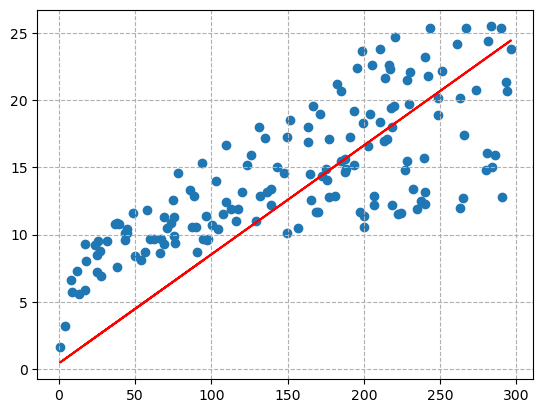

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0811 * X_train + 0.4240, color='red')
plt.grid(visible=True, linestyle = '--')
plt.show

In [16]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1,1)

    def forward(self, x):
        return self.linear(x)

In [27]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

# seed 값 픽스
torch.manual_seed(124)

features, targets = pre_a_df.iloc[:,:-1],pre_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(),lr= 1e-5)

epochs= 1500000


for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0: 
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss:{:.4f}'\
              .format(epoch, epochs,W,b, loss.item()))

100000/1500000: W: 0.0803, b: 0.5781, loss:20.8899
200000/1500000: W: 0.0788, b: 0.8760, loss:20.0025
300000/1500000: W: 0.0774, b: 1.1609, loss:19.1918
400000/1500000: W: 0.0760, b: 1.4323, loss:18.4542
500000/1500000: W: 0.0747, b: 1.6917, loss:17.7810
600000/1500000: W: 0.0734, b: 1.9396, loss:17.1667
700000/1500000: W: 0.0722, b: 2.1781, loss:16.6025
800000/1500000: W: 0.0711, b: 2.4028, loss:16.0947
900000/1500000: W: 0.0700, b: 2.6173, loss:15.6314
1000000/1500000: W: 0.0689, b: 2.8281, loss:15.1971
1100000/1500000: W: 0.0680, b: 3.0188, loss:14.8216
1200000/1500000: W: 0.0670, b: 3.2096, loss:14.4628
1300000/1500000: W: 0.0661, b: 3.3897, loss:14.1393
1400000/1500000: W: 0.0652, b: 3.5566, loss:13.8530
1500000/1500000: W: 0.0644, b: 3.7235, loss:13.5795


<function matplotlib.pyplot.show(close=None, block=None)>

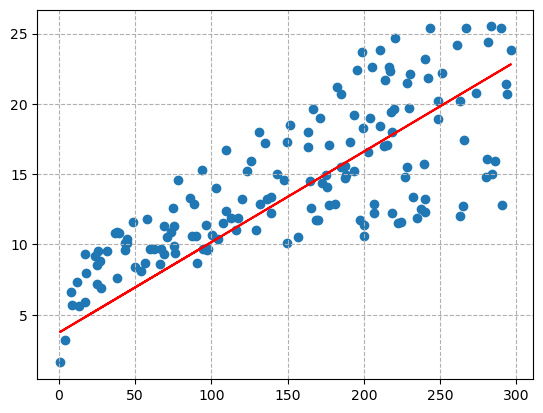

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0644* X_train + 3.7235, color='red')
plt.grid(visible=True, linestyle = '--')
plt.show

In [35]:
import numpy as np
H = 0.0644* X_test + 3.7235
# MSE
print(mse_loss(H,y_test).item())
# RMSE
print(np.sqrt(mse_loss(H,y_test).item()))

12.113512992858887
3.48044724034985


<function matplotlib.pyplot.show(close=None, block=None)>

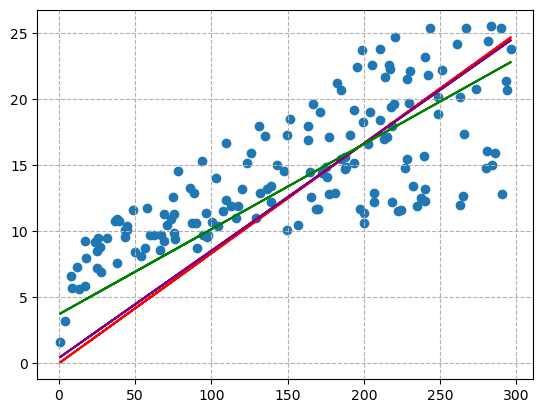

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0832 * X_train + 0.0170, color='red')
plt.plot(X_train, 0.0811 * X_train + 0.4240, color='purple')
plt.plot(X_train, 0.0644* X_train + 3.7235, color='green')
plt.grid(visible=True, linestyle = '--')
plt.show

In [34]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Module, Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

# seed 값 픽스
torch.manual_seed(124)

features, targets = pre_a_df.iloc[:,:-1],pre_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()
optimizer = SGD(l_r.parameters(),lr= 34533e-10)

epochs= 100000


for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0: 
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss:{:.4f}'\
              .format(epoch, epochs,W,b, loss.item()))

10000/100000: W: 0.0813, b: 0.3756, loss:21.5167
20000/100000: W: 0.0808, b: 0.4832, loss:21.1813
30000/100000: W: 0.0803, b: 0.5891, loss:20.8565
40000/100000: W: 0.0797, b: 0.6933, loss:20.5418
50000/100000: W: 0.0792, b: 0.7959, loss:20.2370
60000/100000: W: 0.0787, b: 0.8969, loss:19.9417
70000/100000: W: 0.0782, b: 0.9963, loss:19.6556
80000/100000: W: 0.0777, b: 1.0941, loss:19.3784
90000/100000: W: 0.0772, b: 1.1903, loss:19.1102
100000/100000: W: 0.0767, b: 1.2851, loss:18.8501


### sklean-linearRegression task

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_a_df.iloc[:,:-1], pre_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size= 0.2, random_state=124)


l_r= LinearRegression()
l_r.fit(X_train, y_train)
print('W:{:,.4f}, b:{:,.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:0.0467, b:7.2020


In [41]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('mes_loss :{:,.4f}, rmse_loss :{:,.4f}'.format(mean_squared_error(y_test, prediction), np.sqrt(mean_squared_error(y_test,prediction))))

mes_loss :9.4174, rmse_loss :3.0688


<function matplotlib.pyplot.show(close=None, block=None)>

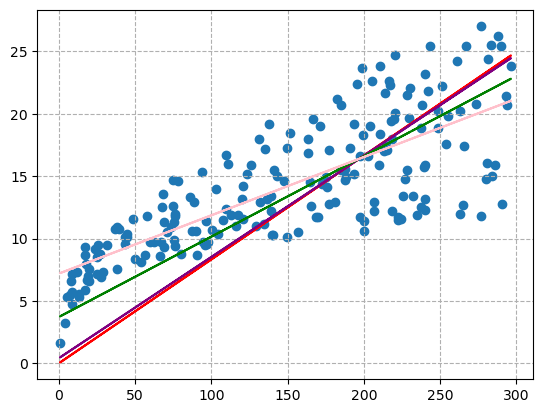

In [44]:
import matplotlib.pyplot as plt

plt.scatter(pre_a_df.TV, pre_a_df.Sales)
plt.plot(pre_a_df.TV, 0.0832 *pre_a_df.TV + 0.0170, color='red')
plt.plot(pre_a_df.TV, 0.0811 * pre_a_df.TV + 0.4240, color='purple')
plt.plot(pre_a_df.TV, 0.0644* pre_a_df.TV + 3.7235, color='green')
plt.plot(pre_a_df.TV, 0.0467* pre_a_df.TV + 7.2020, color='pink')
plt.grid(visible=True, linestyle = '--')
plt.show